# Categorical Model Dedicated Notebook

## Data Admin:

15795
15795
15795
15795
(15795, 28, 28, 3)
11562


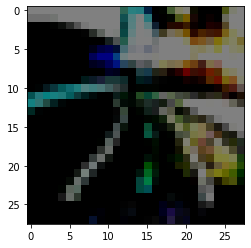

[0. 0. 1.]


In [38]:
import os
import natsort
import numpy as np
import cv2
import json
import tensorflow as tf
from random import randrange

import matplotlib.pyplot as plt

%matplotlib inline

#finding and sorting images and label data: - Unthresholded Images!
path = 'halldatarecords2/'

im_list = []

rec_list = []

for file in os.listdir(path):
    if 'cam' in file:
        im_list.append(file)
    elif 'record' in file:
        rec_list.append(file)

        
print(len(im_list))
print(len(rec_list))

im_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
rec_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

#reading in array of images:
width = 28#img.shape[1] # keep original width
height = 28
color = 3
dim = (width, height)
#width, height, color
#x_images = np.zeros((len(rec_list), 120, 160, 3), dtype = np.float32)
x_images = np.zeros((len(rec_list), width, height, color), dtype = np.float32)

randomImage = randrange(len(x_images))#14909
for i in range(len(im_list)):
    filename = im_list[i]
    image = cv2.imread(path+filename)
    image = cv2.threshold(image, 128, 128, cv2.THRESH_BINARY)[1]
    image = cv2.resize(image,(height,width),interpolation = cv2.INTER_AREA)
    x_images[i,:,:,:] = tf.cast(image, tf.float32)
    
#loop over labels and create a list of left/right/straight based on a degree threshold (one-hot encoding?)
json_data = {}
y_labels = np.zeros((len(rec_list),3), dtype=np.float32) #setup label array for one-hot encoded left, right and straight
for i in range(len(rec_list)):
    filename = rec_list[i]
    with open(path+filename) as fp:
        json_data = json.load(fp)
        orient = json_data['user/angle']
        orient = float(orient)
        if orient > 0.05:
            y_labels[i] = [0,0,1] #right
            
        elif orient < -0.05:
            y_labels[i] = [1,0,0] #left
            
        else:
            y_labels[i] = [0,1,0] #straight
            
print(len(x_images))
print(len(y_labels))
print(x_images.shape)
print(randomImage)
plt.imshow(x_images[randomImage].astype('uint8'))
plt.show()
print(y_labels[randomImage])

(15795, 3)
700
1700
2700
3700
4700
5700
6700
7700
8700
9700
10700
11700
12700
13700
14700
(11057, 28, 28, 3)
(4739, 28, 28, 3)
(11057, 3)
(4739, 3)
[1. 0. 0.]


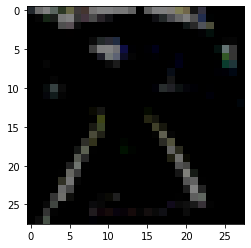

In [39]:
#training and validation split:

memv = 0
memt = 0
#x_val = np.zeros((round(len(x_images)*0.3)+1,120,160,3), dtype=np.float32)
#x_train = np.zeros((round(len(x_images)*0.7)+1,120,160,3), dtype=np.float32)
#y_val = np.zeros((round(len(x_images)*0.3)+1,3), dtype=np.float32)
#y_train = np.zeros((round(len(x_images)*0.7)+1,3), dtype=np.float32)
x_val = np.zeros((round(len(x_images)*0.3)+1,width, height, color), dtype=np.float32)
x_train = np.zeros((round(len(x_images)*0.7)+1,width, height, color), dtype=np.float32)
y_val = np.zeros((round(len(x_images)*0.3)+1,3), dtype=np.float32)
y_train = np.zeros((round(len(x_images)*0.7)+1,3), dtype=np.float32)

n=0
print(y_labels.shape)

for i in range(len(x_images)):
    if (i>=1000)and(i % 1000 == 0):
        j = i - 300
        k = i - 1000
        print(j)
        o = 0
        p = 0
        for l in range(0+n*300, n*300+300):
            #x_val[l] = x_images[j+o,:,:,:]
            x_val[l] = x_images[j+o,:,:,:]
            y_val[l] = y_labels[j+o]
            o +=1
        for m in range(0+n*700, n*700+700):
            #x_train[m] = x_images[k+p,:,:,:]
            x_train[m] = x_images[k+p,:,:,:]
            y_train[m] = y_labels[k+p]
            p+=1
        n+=1
        
print(x_train.shape)
print(x_val.shape)

print(y_train.shape)
print(y_val.shape)

print(y_val[1000])
plt.imshow(x_val[1000].astype('uint8'))
plt.show()
#obtaining test data

#relabeling test data

## Model Setup:

In [40]:
# Imports: Tensorflow 1.14.0 is used
import os
import numpy as np

from tensorflow.python import keras
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D, Reshape, BatchNormalization
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Cropping2D, Lambda

#Model Structure Setup: no dropout, no regularization yet

#model = ''
model = Sequential()
#model.add(Convolution2D(24, (5,5), strides=(2,2), activation='relu', input_shape=(120, 160, 3)))
model.add(Convolution2D(24, (5,5), strides=(2,2), activation='relu', input_shape=(28,28,3)))
model.add(Convolution2D(32, (3,3), strides=(2,2), activation='relu'))
model.add(Convolution2D(64, (3,3), strides=(2,2), activation='relu'))
#model.add(Convolution2D(64, (3,3), strides=(1,1), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))
#model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(28, 28,3)),
#    keras.layers.Dense(128, activation='relu'),
#    keras.layers.Dense(10, activation='softmax')
#])
# Compile model:
#model.compile(optimizer='SGD',
#              loss='binary_crossentropy',
#             metrics=['accuracy'])

#model.compile(optimizer='adam',
#    loss='categorical_crossentropy',
#    metrics=['categorical_accuracy'])

#model.compile(optimizer='adam',
#    loss='binary_crossentropy',
#    metrics=['binary_accuracy'])

model.compile(optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 12, 12, 24)        1824      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 5, 32)          6944      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 2, 64)          18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                

## Training and Validation:

In [47]:
model.fit(x_train, y_train, epochs=20, batch_size=200, validation_data=(x_val, y_val), shuffle=True, verbose=1)

Train on 11057 samples, validate on 4739 samples
Epoch 1/20
11057/11057 [==============================] - 1s 103us/sample - loss: 0.0925 - accuracy: 0.9148 - val_loss: 1.0018 - val_accuracy: 0.6942
Epoch 2/20
11057/11057 [==============================] - 1s 106us/sample - loss: 0.0841 - accuracy: 0.9195 - val_loss: 1.1505 - val_accuracy: 0.7350
Epoch 3/20
11057/11057 [==============================] - 1s 117us/sample - loss: 0.0808 - accuracy: 0.9214 - val_loss: 1.2400 - val_accuracy: 0.7137
Epoch 4/20
11057/11057 [==============================] - 1s 110us/sample - loss: 0.0713 - accuracy: 0.9265 - val_loss: 1.4345 - val_accuracy: 0.7215
Epoch 5/20
11057/11057 [==============================] - 1s 108us/sample - loss: 0.0678 - accuracy: 0.9261 - val_loss: 1.1626 - val_accuracy: 0.7084
Epoch 6/20
11057/11057 [==============================] - 1s 114us/sample - loss: 0.0810 - accuracy: 0.9200 - val_loss: 1.1833 - val_accuracy: 0.7077
Epoch 7/20
11057/11057 [===========================

In [48]:
# Let's Evaluate
model.evaluate(x_val,  y_val, verbose=2)

4739/1 - 0s - loss: 0.8300 - accuracy: 0.7168


[1.6599709478859075, 0.7168179]

right
Expected
[0. 0. 1.]
Predicted
[1.4018614e-06 3.3436320e-06 9.9999523e-01]


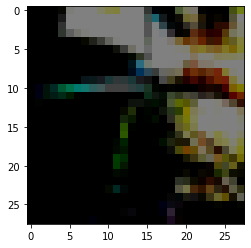

right
Expected
[0. 0. 1.]
Predicted
[7.547313e-09 9.726074e-06 9.999902e-01]


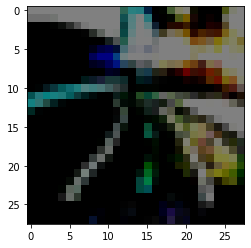

right
Expected
[0. 0. 1.]
Predicted
[1.9484591e-07 4.2268369e-11 9.9999976e-01]


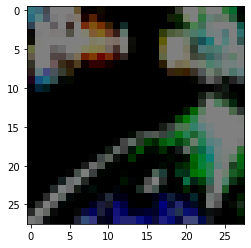

In [46]:
out = model.predict(x_images, batch_size=200)

pointOne = randomImage
pointTwo = randomImage
pointThree = randomImage

if randomImage >= 100:
    pointOne = randomImage - 100
else:
    pointOne = 0
    
if randomImage <= len(x_images) + 100:
    pointThree = randomImage + 100
else:
    pointThree = len(x_images)

if round(out[pointOne,0]) == 1:
    print('left')
elif round(out[pointOne, 1]) == 1:
    print('straight')
elif round(out[pointOne, 2]) == 1:
    print('right')
print('Expected')
print(y_labels[pointOne])
print('Predicted')
print(out[pointOne])
plt.imshow(x_images[pointOne].astype('uint8'))
plt.show()

if round(out[pointTwo,0]) == 1:
    print('left')
elif round(out[pointTwo, 1]) == 1:
    print('straight')
elif round(out[pointTwo, 2]) == 1:
    print('right')
print('Expected')
print(y_labels[pointTwo])
print('Predicted')
print(out[pointTwo])
plt.imshow(x_images[pointTwo].astype('uint8'))
plt.show()

if round(out[pointThree,0]) == 1:
    print('left')
elif round(out[pointThree, 1]) == 1:
    print('straight')
elif round(out[pointThree, 2]) == 1:
    print('right')
print('Expected')
print(y_labels[pointThree])
print('Predicted')
print(out[pointThree])
plt.imshow(x_images[pointThree].astype('uint8'))
plt.show()